In [12]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from numba import njit
import matplotlib.patches as mpatches

In [13]:
path= "Spain/spain_data_clusters2.csv"
data = pd.read_csv(path)
data.date = pd.to_datetime(data.date)

In [14]:
def plot_by(PLOT_BY, title):
    DATES = data.groupby([pd.Grouper(key='date', freq='M')], as_index=False).size()
    DATES.rename(columns = {'size' : 'total'}, inplace=True)
    DATES.set_index('date',inplace=True)


    LINEAGE_PER_MONTH = data.groupby([pd.Grouper(key='date', freq='M'), PLOT_BY], as_index=False).size()
    LINEAGE_PER_MONTH.set_index('date', inplace=True)


    RESULTS = DATES


    TEST_lineages = data[PLOT_BY].unique()

    for lineage in TEST_lineages:
        t = LINEAGE_PER_MONTH.loc[LINEAGE_PER_MONTH[PLOT_BY] == lineage]
        t = t.rename(columns = {'size' : lineage})
        t = t.drop(PLOT_BY, axis=1)
        RESULTS = pd.concat([RESULTS, t], join="outer", ignore_index=False, axis = 1)


    FIGSIZE = (7, 5)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.ylim([0.,1.1])
    plt.grid()
    
    ax.set_yticks(np.arange(0.,1.2,0.2), range(0,120,20))
    plt.xlabel('Month')
    plt.ylabel('Percentage (%)')
    plt.title(title)

    for lineage in TEST_lineages:
        percentage = RESULTS[lineage]/RESULTS.total

        if np.max(percentage)>0.1:
            
            label = f"Cluster {int(lineage)}" if PLOT_BY != 'pangolin_lineage' else lineage
            plt.plot(RESULTS.index, percentage, label = label)


    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.show()

def plot_cases():
    DATES = data.groupby([pd.Grouper(key='date', freq='M')], as_index=False).size()
    DATES.rename(columns = {'size' : 'total'}, inplace=True)
    DATES.set_index('date',inplace=True)


    LINEAGE_PER_MONTH = data.groupby([pd.Grouper(key='date', freq='M'), 'pangolin_lineage'], as_index=False).size()
    LINEAGE_PER_MONTH.set_index('date', inplace=True)


    RESULTS = DATES
    
    FIGSIZE = (7, 5)

    plt.figure(figsize=FIGSIZE)
    plt.grid(True)
    plt.plot(RESULTS.index, RESULTS.total)
    plt.xlabel('Month')
    plt.ylabel('Uploaded sequences on GISAID')
    plt.title('Time Series of documented SARS-CoV-2 cases from GISAID (Spain)')
    plt.show()

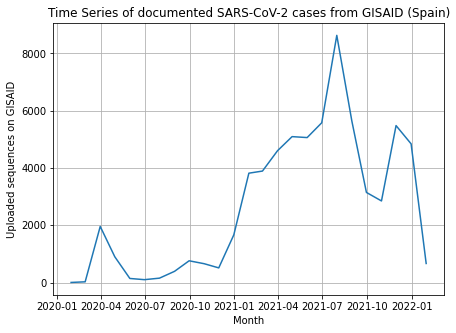

In [15]:
plot_cases()

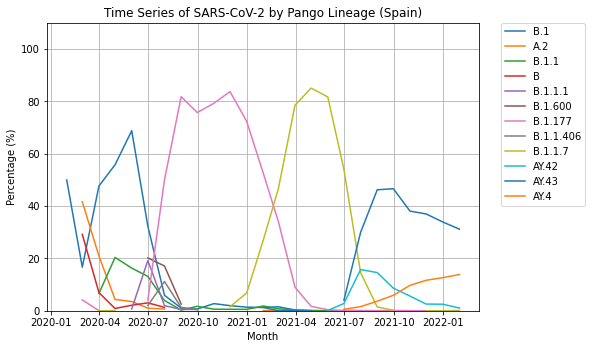

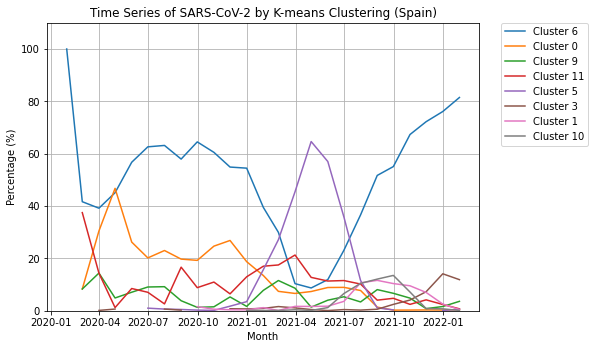

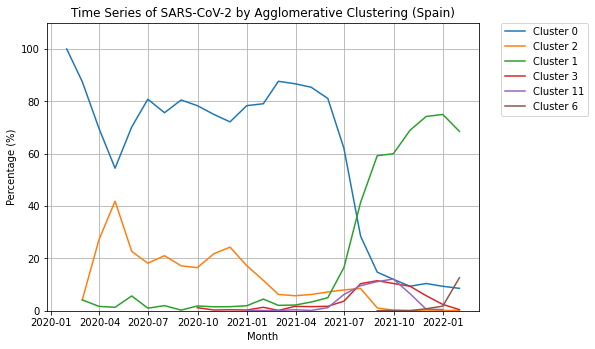

In [16]:
plot_by('pangolin_lineage', 'Time Series of SARS-CoV-2 by Pango Lineage (Spain)')
plot_by('km_clusters2', 'Time Series of SARS-CoV-2 by K-means Clustering (Spain)')
plot_by('agg_clusters', 'Time Series of SARS-CoV-2 by Agglomerative Clustering (Spain)')


In [20]:
from matplotlib.colors import LinearSegmentedColormap

#9
alpha = ['#7b80ef', '#4e56ee', '#3b44ed',
         '#a986f1', '#824fea', '#d3bdfe', '#7c7eaa', '#4ea5ff', '#76caff']

#7
beta = ['#f7a16f','#bd2800', '#d95757','#f33300',
        '#ee5830', '#eb5e00', '#a05750', '#cf6447', '#ffac75', '#e86052']

color_dict = {'B.1.1.7': '#d45e2b', 
                'B.1': '#ed924f', 
                'B.1.351.5':'#f0b076', 
                'B.1.617.2': '#f6d1a8', 
                'B.1.221': '#876d3b', 
                'B.1.177': '#b89e4c', 
                'B.1.177.32': '#e0bb63', 
                'B.1.2': '#e2cb9b', 
                'B.1.1': '#7a403c', 
                'B.1.636': '#a04f4d', 
                'B.1.1.348': '#c7686d', 
                'P.1': '#da9a9d', 
                'P.1.17': '#995891', 
                'P.1.7': '#bf74b9', 
                'AY.4': '#4881b8', 
                'AY.42': '#7aadd2', 
                'AY.43': '#a7c9df', 
                'AY.4.2': '#cadaed', 
                'AY.9.2': '#383d75', 
                'AY.9.2.2': '#51569e', 
                'AY.20': '#6a71c9', 
                'AY.53': '#9ba0d9', 
                'AY.5': '#726dac', 
                'AY.33': '#9c9bc4', 
                'AY.36': '#bcbed9', 
                'AY.121': '#dadaea', 
                'AY.122': '#724570', 
                'AY.124': '#995891', 
                'AY.125': '#bf74b9', 
                'AY.126': '#d3a2d3', 
                'AY.127': '#58a05c', 
                'AY.112': '#89c17e', 
                'AY.38': '#aed6a1', 
                'AY.73': '#cfe7c3', 
                'AY.98.1': '#687741', 
                'AY.4.2.3': '#91a05c',
                'AY.34': '#bbcc78',
                'A.2': '#d1daa3'
                }


In [21]:

def plot_bars(labels, clusters, total_nums, title):
    width = 0.3
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_axes([0,0,1,1])

    index = 0
    for label, cluster, num in zip(labels,clusters, total_nums):
        lower = 0
        upper = 0
        for i, c in enumerate(cluster):
            ax.bar([index], [c], width, bottom=[lower], color = [color_dict.get(label[i], '#943955')])
            upper += c
            
            delta = (upper-lower)/2
            if delta > 1:
                text_center = lower + delta
                plt.text(index, text_center, label[i], ha = 'center',
                        bbox = dict(facecolor = 'white', alpha = .5))
            lower = upper
            if i==len(cluster)-1:
                plt.text(index, (upper+2), num, ha = 'center')

        index+=1
    ax.set_axisbelow(True) 
    ax.grid(axis = 'y')
    plt.ylim([0,110])
    ax.set_xticks(range(index), [f"Cluster {i}" for i in range(index)])
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    ax.set_ylabel('Percentage (%)')
    ax.set_title(title)

    plt.show()

In [22]:

def display_contents(cluster):
    PLOT_BY = 'pangolin_lineage'
    data = pd.read_csv(path)
    DATES = data.groupby([pd.Grouper(key=cluster)], as_index=False).size()
    DATES.rename(columns = {'size' : 'total'}, inplace=True)
    DATES.set_index(cluster,inplace=True)


    LINEAGE_PER_MONTH = data.groupby([pd.Grouper(key=cluster), PLOT_BY], as_index=False).size()
    LINEAGE_PER_MONTH.set_index(cluster, inplace=True)


    RESULTS = DATES


    TEST_lineages = data[PLOT_BY].unique()

    for lineage in TEST_lineages:
        t = LINEAGE_PER_MONTH.loc[LINEAGE_PER_MONTH[PLOT_BY] == lineage]
        t = t.rename(columns = {'size' : lineage})
        t = t.drop(PLOT_BY, axis=1)
        RESULTS = pd.concat([RESULTS, t], join="outer", ignore_index=False, axis = 1)

    for i in range(12):
        a = RESULTS.loc[i].dropna()
        a = a/a.total
        a = a.sort_values(ascending = False)
        top_5 = list(zip(a.index[1:6], a.values[1:6]))
        lineages_in_cluster = len(a)-1
        data = a.values[1:6]*100//1
        colums = a.index[1:6]
        print(lineages_in_cluster, end = '')
        b = pd.DataFrame(data =[data], index =[f'Cluster {i}'] , columns = colums)
        display(b)
        
        
def display_contents2(cluster, title):
    PLOT_BY = 'pangolin_lineage'
    data = pd.read_csv(path)
    DATES = data.groupby([pd.Grouper(key=cluster)], as_index=False).size()
    DATES.rename(columns = {'size' : 'total'}, inplace=True)
    DATES.set_index(cluster,inplace=True)


    LINEAGE_PER_MONTH = data.groupby([pd.Grouper(key=cluster), PLOT_BY], as_index=False).size()
    LINEAGE_PER_MONTH.set_index(cluster, inplace=True)


    RESULTS = DATES


    TEST_lineages = data[PLOT_BY].unique()

    for lineage in TEST_lineages:
        t = LINEAGE_PER_MONTH.loc[LINEAGE_PER_MONTH[PLOT_BY] == lineage]
        t = t.rename(columns = {'size' : lineage})
        t = t.drop(PLOT_BY, axis=1)
        RESULTS = pd.concat([RESULTS, t], join="outer", ignore_index=False, axis = 1)
    
    labels = []
    values = []
    total_nums = []
    for i in range(12):
        a = RESULTS.loc[i].dropna()
        a = a/a.total
        a = a.sort_values(ascending = False)
        top_5 = list(zip(a.index[1:6], a.values[1:6]))
        lineages_in_cluster = len(a)-1
        data = a.values[1:6]*100//1
        colums = a.index[1:6]
        #print(lineages_in_cluster, end = '')
        b = pd.DataFrame(data =[data], index =[f'Cluster {i}'] , columns = colums)
        labels.append(b.columns)
        values.append(b.values[0])
        total_nums.append(lineages_in_cluster)
        
        #display(b)
    #print(titles,values)
    
    plot_bars(np.array(labels, dtype=object), np.array(values, dtype=object), total_nums, title)
    
    

In [23]:
no_clusters, cluster_count = np.unique(data['agg_clusters'], return_counts=True)
print(no_clusters)
print(cluster_count)


[ 0  1  2  3  4  5  6  7  8  9 10 11]
[32587 20728  4648  3102   255   423   223   233   193  1249   352  2524]


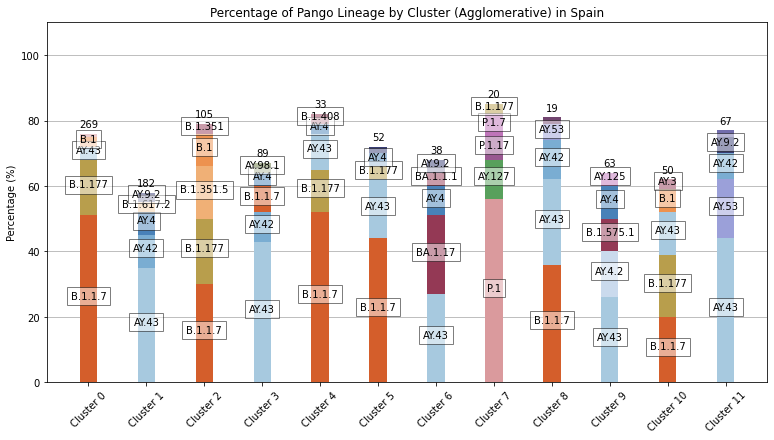

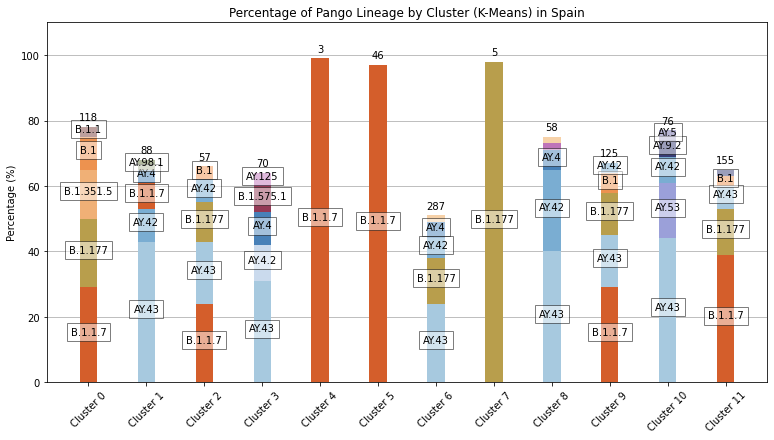

In [24]:
display_contents2('agg_clusters','Percentage of Pango Lineage by Cluster (Agglomerative) in Spain')
display_contents2('km_clusters2','Percentage of Pango Lineage by Cluster (K-Means) in Spain')